In [2]:
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import os
import math
from scipy import signal
import scipy
from scipy.fft import fft, fftfreq
from scipy.signal import find_peaks


Analyzing writing glucose data. Seeing the difference between PPG data while not moving versus writing

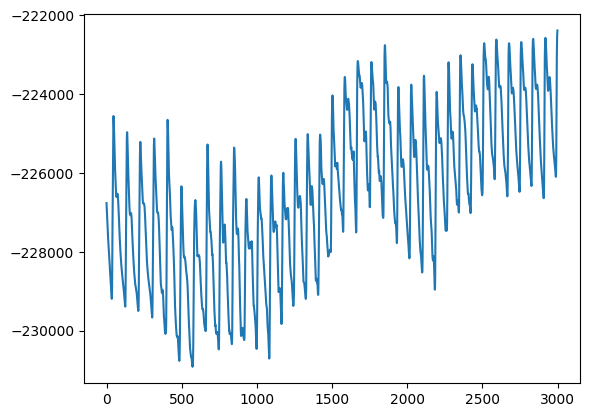

In [3]:
time, y1, y2 = np.loadtxt('/Users/henrywang/Documents/PPGBP/PPGGlucoseDetection/GlucoseReadings/2024-08-19/index-writing-11-56-08.txt', delimiter = ",", unpack=True)
y1 = -y1
y2 = -y2


intervalStart = 20
intervalEnd = 50

writingY1 = y1[intervalStart * 100: intervalEnd * 100]
# sos = signal.butter(2, [0.5, 8], fs=100, btype='band', output='sos')
# y2 = (signal.sosfiltfilt(sos, y2))

plt.plot(writingY1)


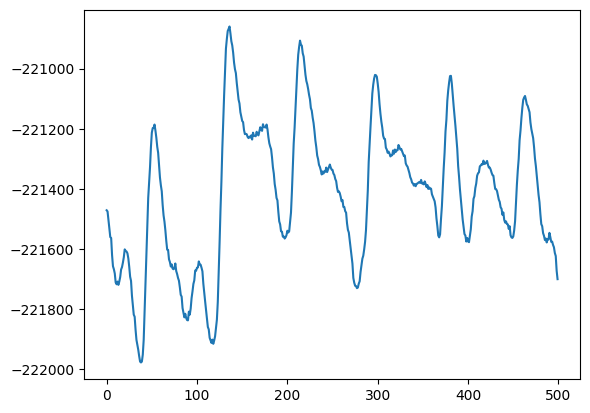

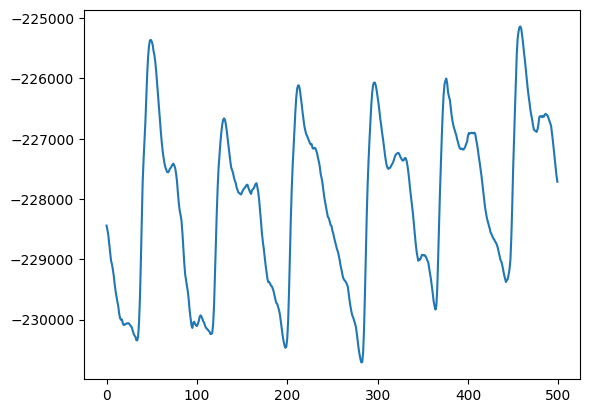

In [4]:
plt.plot(y2[2800:3300])
plt.show()
plt.plot(y1[2800:3300])
plt.show()

In [5]:
fpass = [0.5, 6.5]  # Passband frequency range
order = 3
sos = signal.butter(order, fpass, fs=100, btype='band', output='sos')


start = 3000
writingFinger = signal.sosfiltfilt(sos, y1)[start:start + 500]
writingToe = signal.sosfiltfilt(sos, y2)[start:start + 500]
writing_features =  np.array([[17, 179, 172.2, 90, 64, 2, 937]])

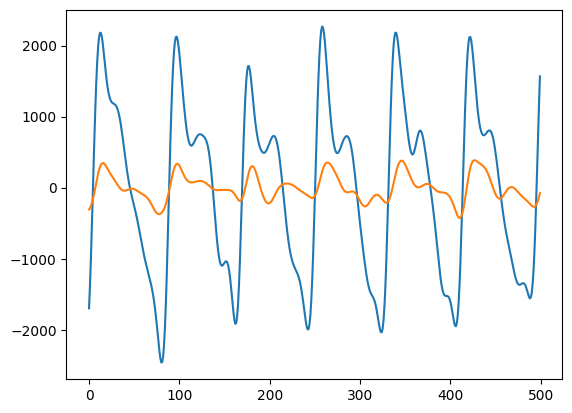

In [6]:
plt.plot(writingFinger)
plt.plot(writingToe)

In [71]:
# np.save("/Users/henrywang/Documents/PPGCaffeineDetection/GlucoseReadings/2024-08-15/second/writing/writingFinger", writingFinger)
# np.save("/Users/henrywang/Documents/PPGCaffeineDetection/GlucoseReadings/2024-08-15/second/writing/writingToe", writingToe)
# np.save("/Users/henrywang/Documents/PPGCaffeineDetection/GlucoseReadings/2024-08-15/second/writing/writingFeatures", writing_features)

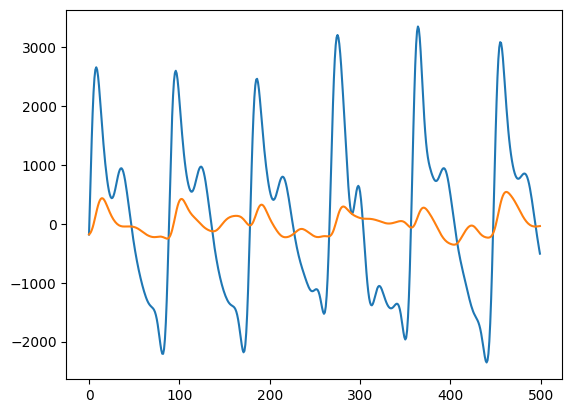

In [8]:
#Having a control for the finger
controlFinger = signal.sosfiltfilt(sos, y1)[550:1050]
controlToe = signal.sosfiltfilt(sos, y2)[550:1050]

plt.plot(controlFinger)
plt.plot(controlToe)

Creating a graph to compare control versus writing

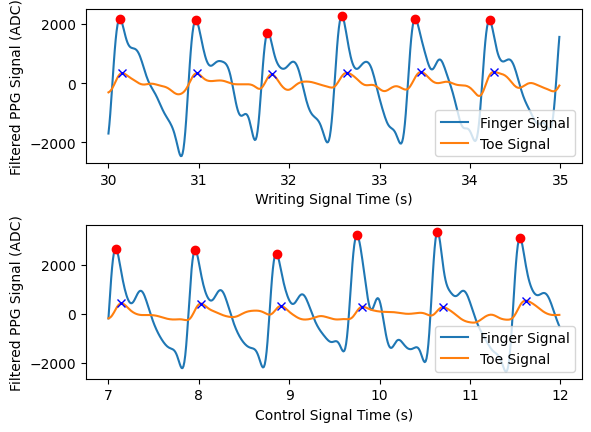

In [10]:
fig, axs = plt.subplots(2, 1, sharex=False)
fig.subplots_adjust(hspace=0.4)

start = 3000
writingFinger = signal.sosfiltfilt(sos, y1)[start:start + 500]
writingToe = signal.sosfiltfilt(sos, y2)[start:start + 500]

peaksY1, _ = find_peaks(writingFinger, height = 300,  distance = 50)
peaksY2, _ = find_peaks(writingToe, height = 300, distance = 50)

# peaksY1, _ = find_peaks(writingFinger)
# peaksY2, _ = find_peaks(writingToe)
axs[0].plot(np.arange(start/100, start/100+5, 0.01), writingFinger, label = "Finger Signal")
axs[0].plot(np.arange(start/100, start/100+5, 0.01), writingToe, label = "Toe Signal")
axs[0].set_xlabel("Writing Signal Time (s)")
axs[0].legend(loc = 'lower right')

axs[0].plot(peaksY1/100 + start/100, writingFinger[peaksY1], "o", color = "red")
axs[0].plot(peaksY2/100 + start/100, writingToe[peaksY2], "x", color = "blue")

axs[0].set_ylabel("Filtered PPG Signal (ADC)")

axs[1].plot(np.arange(7, 7+5, 0.01),controlFinger, label = "Finger Signal")
axs[1].plot(np.arange(7, 7+5, 0.01), controlToe,label = "Toe Signal")
axs[1].set_xlabel("Control Signal Time (s)")
axs[1].legend(loc = 'lower right')
axs[1].set_ylabel("Filtered PPG Signal (ADC)")


peaksY1Controlled, _ = find_peaks(controlFinger, height = 200, distance = 50)
peaksY2Controlled, _ = find_peaks(controlToe, height = 200, distance = 50)

axs[1].plot(peaksY1Controlled/100 + 7, controlFinger[peaksY1Controlled], "o", color = "red")
axs[1].plot(peaksY2Controlled/100 + 7, controlToe[peaksY2Controlled], "x", color = "blue")
plt.show()

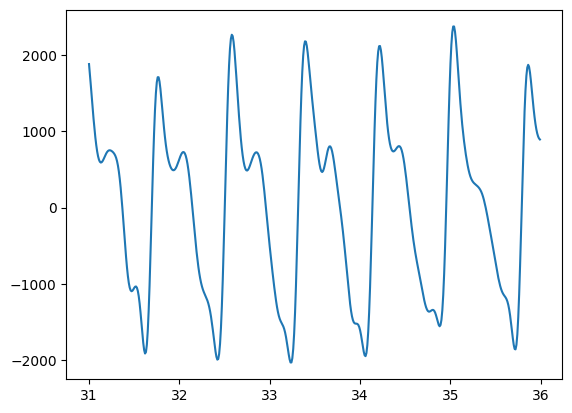

In [74]:
plt.plot(np.arange(start/100, start/100+5, 0.01), writingFinger, label = "Finger Signal")

Creating another graph to show comparison

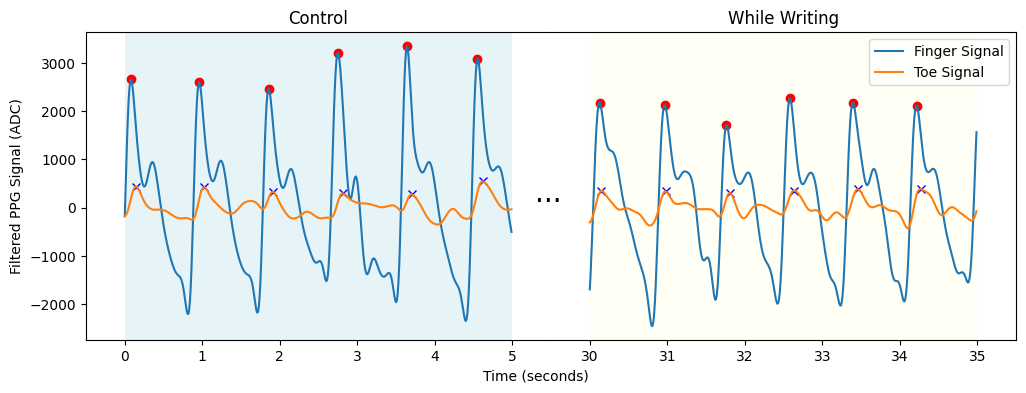

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Example signal data
# time = np.linspace(0, 30, 300)  # 300 points from 0 to 30 seconds
# signal = np.sin(time)  # Example signal (sine wave)

# Filter the signal to only show intervals 5-10 seconds and 20-25 seconds
interval1 = (time >= 7) & (time <= 12)
interval2 = (time >= 20) & (time <= 25)

# Buffer size for the x-axis
buffer = 0.5

# Create subplots with shared y-axis
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12, 4))

# Plot interval 1 (5-10 seconds) on the first subplot

peaksY1Controlled, _ = find_peaks(controlFinger, height = 200, distance = 50)
peaksY2Controlled, _ = find_peaks(controlToe, height = 200, distance = 50)

ax1.plot(peaksY1Controlled/100, controlFinger[peaksY1Controlled], "o", color = "red")
ax1.plot(peaksY2Controlled/100, controlToe[peaksY2Controlled], "x", color = "blue")

ax1.plot(np.arange(0, 5, 0.01),controlFinger, label = "Finger Signal")
ax1.plot(np.arange(0, 5, 0.01), controlToe,label = "Toe Signal")


# ax1.plot(time[interval1], signal[interval1], color='blue')
ax1.set_xlim(0 - buffer, 5 + buffer)
# ax1.set_xlabel('Time (seconds)')
ax1.set_ylabel('Filtered PPG Signal (ADC)')
ax1.set_title('Control')

# Add colored background to the first subplot
ax1.axvspan(0, 5, facecolor='lightblue', alpha=0.3)

# Remove the x-axis ticks and labels within the buffer on the first subplot
# ax1.set_xticks([5, 10])
# ax1.set_xticklabels([5, 10])

# Plot interval 2 (20-25 seconds) on the second subplot

peaksY1, _ = find_peaks(writingFinger, height = 300,  distance = 50)
peaksY2, _ = find_peaks(writingToe, height = 300, distance = 50)


ax2.plot(peaksY1/100 + 30, writingFinger[peaksY1], "o", color = "red")
ax2.plot(peaksY2/100 + 30, writingToe[peaksY2], "x", color = "blue")

ax2.plot(np.arange(30,35, 0.01), writingFinger, label = "Finger Signal")
ax2.plot(np.arange(30,35, 0.01), writingToe, label = "Toe Signal")

# ax2.plot(time[interval2], signal[interval2], color='orange')
ax2.set_xlim(30 - buffer, 35 + buffer)
# ax2.set_xlabel('Time (seconds)')
ax2.set_title('While Writing')

# Add colored background to the second subplot
ax2.axvspan(30, 35, facecolor='lightyellow', alpha=0.3)

# Hide the y-axis line on the second subplot
ax2.spines['left'].set_visible(False)
ax2.yaxis.set_visible(False)
ax2.legend(loc = "upper right")
# Remove the x-axis ticks and labels within the buffer on the second subplot
# ax2.set_xticks([20, 25])
# ax2.set_xticklabels([20, 25])

# Connect the two x-axes by removing the space between them
plt.subplots_adjust(wspace=0)

# Remove the gap between the two plots by overlapping the x-axis ticks
ax1.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

# Add the "..." symbol between the two subplots
fig.text(0.51, 0.475, '...', ha='center', va='center', fontsize=20)
fig.text(0.5, 0.02, 'Time (seconds)', ha='center', va='center', fontsize=10)

# Show the plot
plt.show()



In [14]:
#Finding peaks of the data
print(peaksY1Controlled)
print(peaksY2Controlled)
print(peaksY1)
print(peaksY2)

[  8  96 186 275 364 455]
[ 14 102 191 281 370 462]
[ 13  97 176 258 339 422]
[ 15  98 181 264 346 427]


Pulse transit time is defined as the time it takes for a wave to propagate from one place to another.
This is measured by subtracting same peaks on different parts of body

In [15]:
#Finding the pulse transit time (time it takes for wave to propagate from one place to another by subtracting same peaks on different parts of body)
print(peaksY1)
print(peaksY2)
writingDifference = []
for i in range(len(peaksY1)):
    writingDifference.append(peaksY2[i] - peaksY1[i])

#Finding the period by taking different of peaks
periodY1 = []
periodY2 = []
for i in range(len(peaksY1) - 1):
    periodY1.append(peaksY1[i+1] - peaksY1[i])
    periodY2.append(peaksY2[i+1] - peaksY2[i])

print(periodY1)
print(periodY2)
print(writingDifference)

[ 13  97 176 258 339 422]
[ 15  98 181 264 346 427]
[84, 79, 82, 81, 83]
[83, 83, 83, 82, 81]
[2, 1, 5, 6, 7, 5]


In [16]:
#Same time for controlled
print(peaksY1Controlled)

print(peaksY2Controlled)

writingDifferenceControlled = []
for i in range(len(peaksY1Controlled)):
    writingDifferenceControlled.append(peaksY2Controlled[i] - peaksY1Controlled[i])
print(writingDifferenceControlled)

periodY1Controlled = []
periodY2Controlled = []

for i in range(len(peaksY1Controlled) - 1):
    periodY1Controlled.append(peaksY1Controlled[i+1] - peaksY1Controlled[i])
    periodY2Controlled.append(peaksY2Controlled[i+1] - peaksY2Controlled[i])
print(periodY1Controlled)
print(periodY2Controlled)

[  8  96 186 275 364 455]
[ 14 102 191 281 370 462]
[6, 6, 5, 6, 6, 7]
[88, 90, 89, 89, 91]
[88, 89, 90, 89, 92]


Playing around with different data

In [17]:
time, y1, y2 = np.loadtxt('/Users/henrywang/Documents/PPGBP/PPGGlucoseDetection/GlucoseReadings/2024-08-15/first/index-writing-14-09-24.txt', delimiter = ",", unpack=True)
y1 = -y1
y2 = -y2

In [18]:
filteredY1 = signal.sosfiltfilt(sos, y1[100:])
filteredY2 = signal.sosfiltfilt(sos, y2[100:])

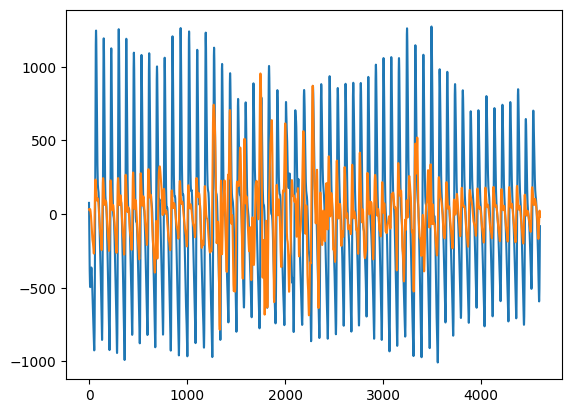

In [19]:
plt.plot(filteredY2)
plt.plot(filteredY1)

In [215]:

controlY1 = filteredY1[100:1200]
controlY2 =  filteredY2[100:1200]

changedY1 = filteredY1[2400:3600]
changedY2 =  filteredY2[2400:3600]

controlPeaksY1, _ = find_peaks(controlY1, height = 100,  distance = 70)
controlPeaksY2, _ = find_peaks(controlY2, height = 100,  distance = 70)

changedPeaksY1, _ = find_peaks(changedY1, height = 50,  distance = 10)
changedPeaksY2, _ = find_peaks(changedY2, height = 50,  distance = 10)

print(len(controlPeaksY1))
print(len(controlPeaksY2))
print(len(changedPeaksY1))
print(len(changedPeaksY2))

13
14
25
15


In [204]:
controlPeaksY2

array([  50,  127,  203,  280,  358,  436,  514,  594,  672,  752,  835,
        921, 1004, 1091])

In [205]:
controlPeaksY1

array([  44,  121,  196,  274,  350,  428,  507,  621,  744,  827,  914,
        997, 1082])

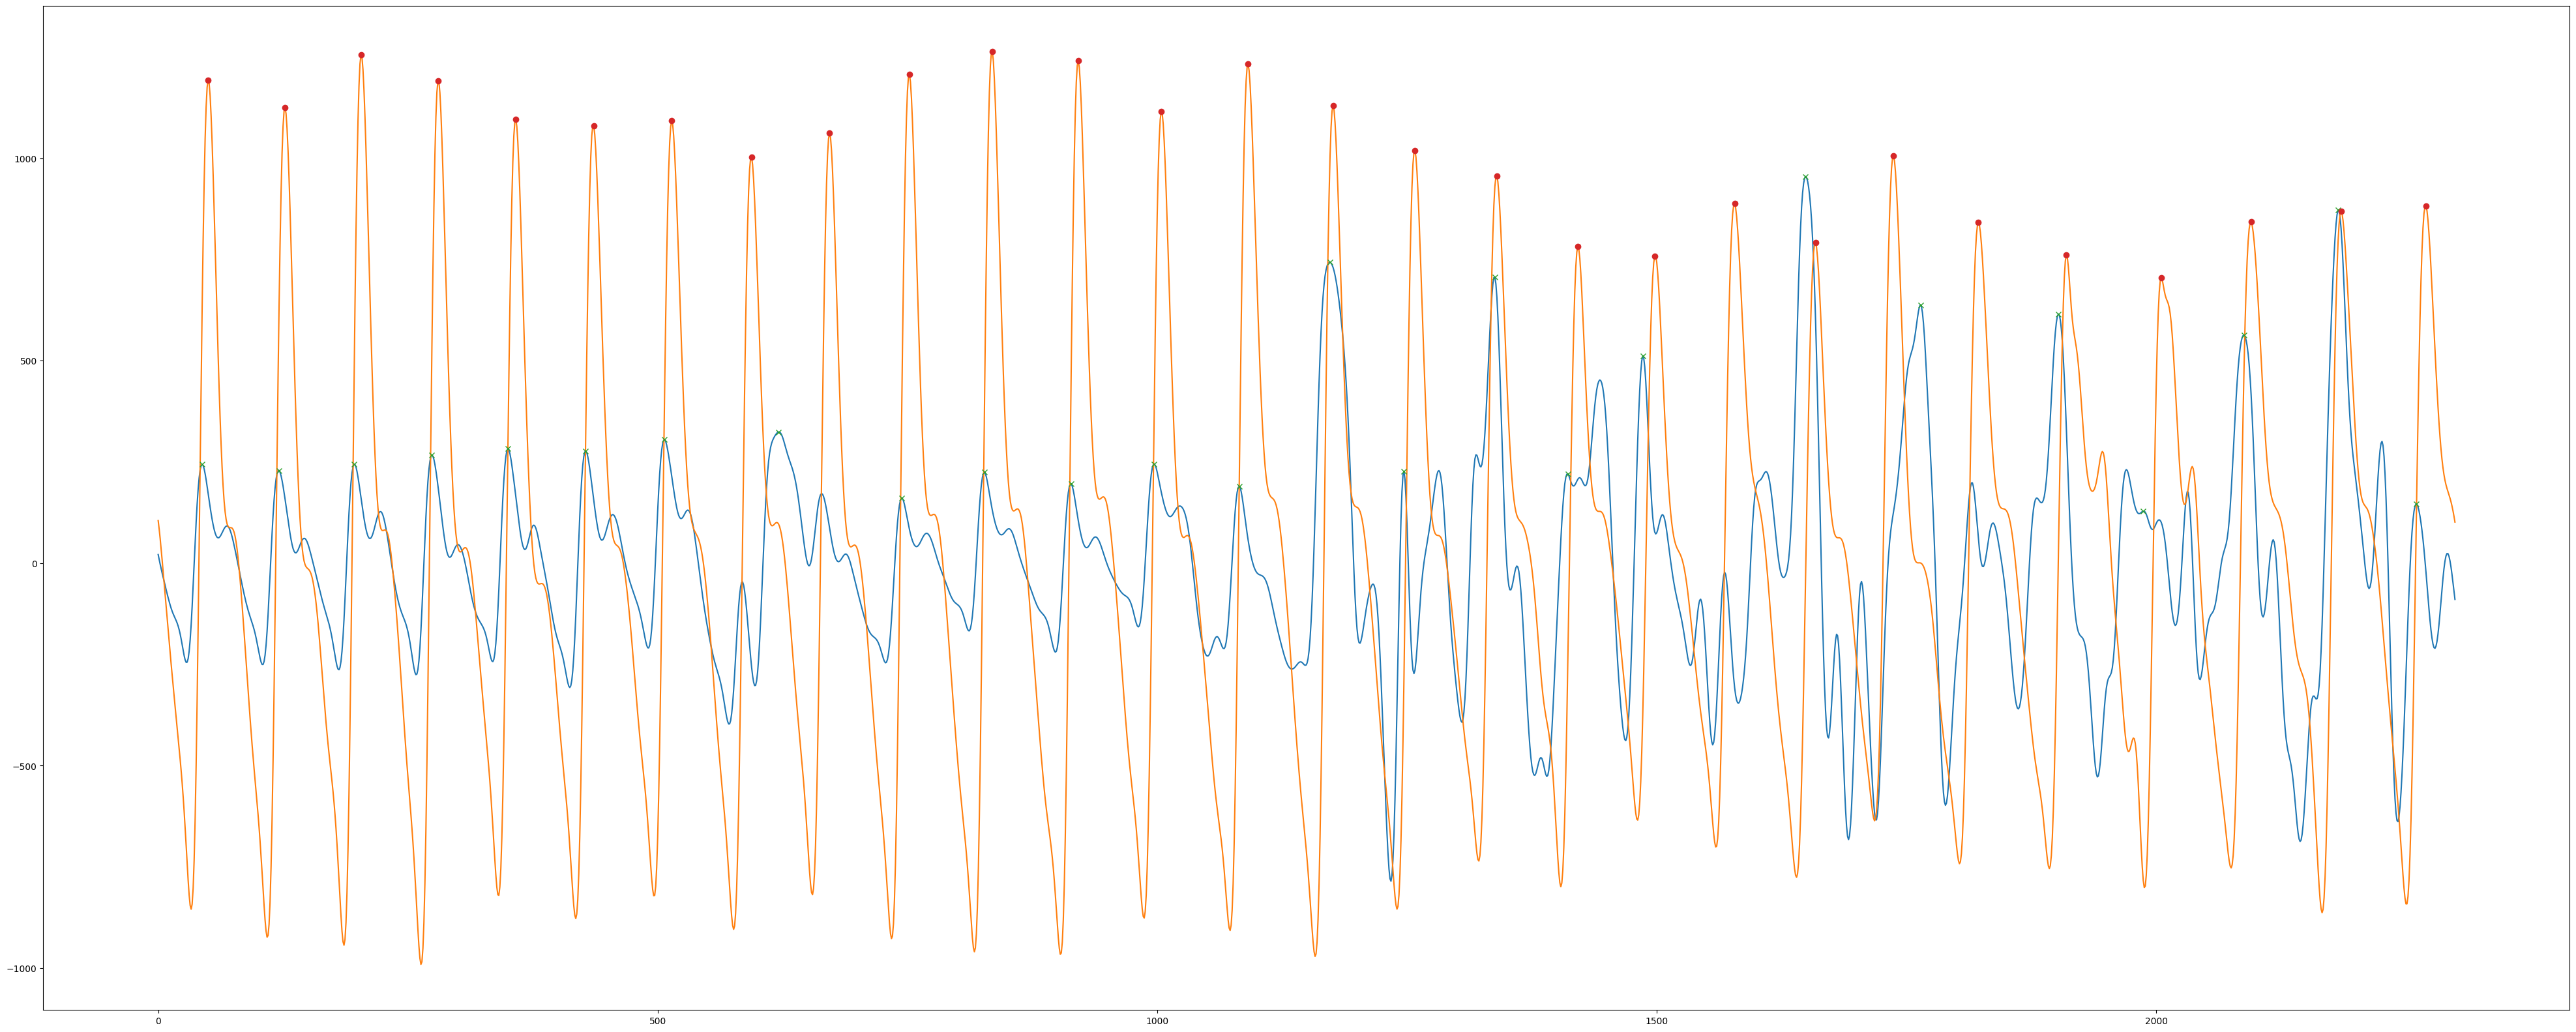

In [202]:
plt.figure(figsize=(50, 20))
plt.plot(controlY1)
plt.plot(controlY2)
plt.plot(controlPeaksY1, controlY1[controlPeaksY1],"x")
plt.plot(controlPeaksY2, controlY2[controlPeaksY2],"o")

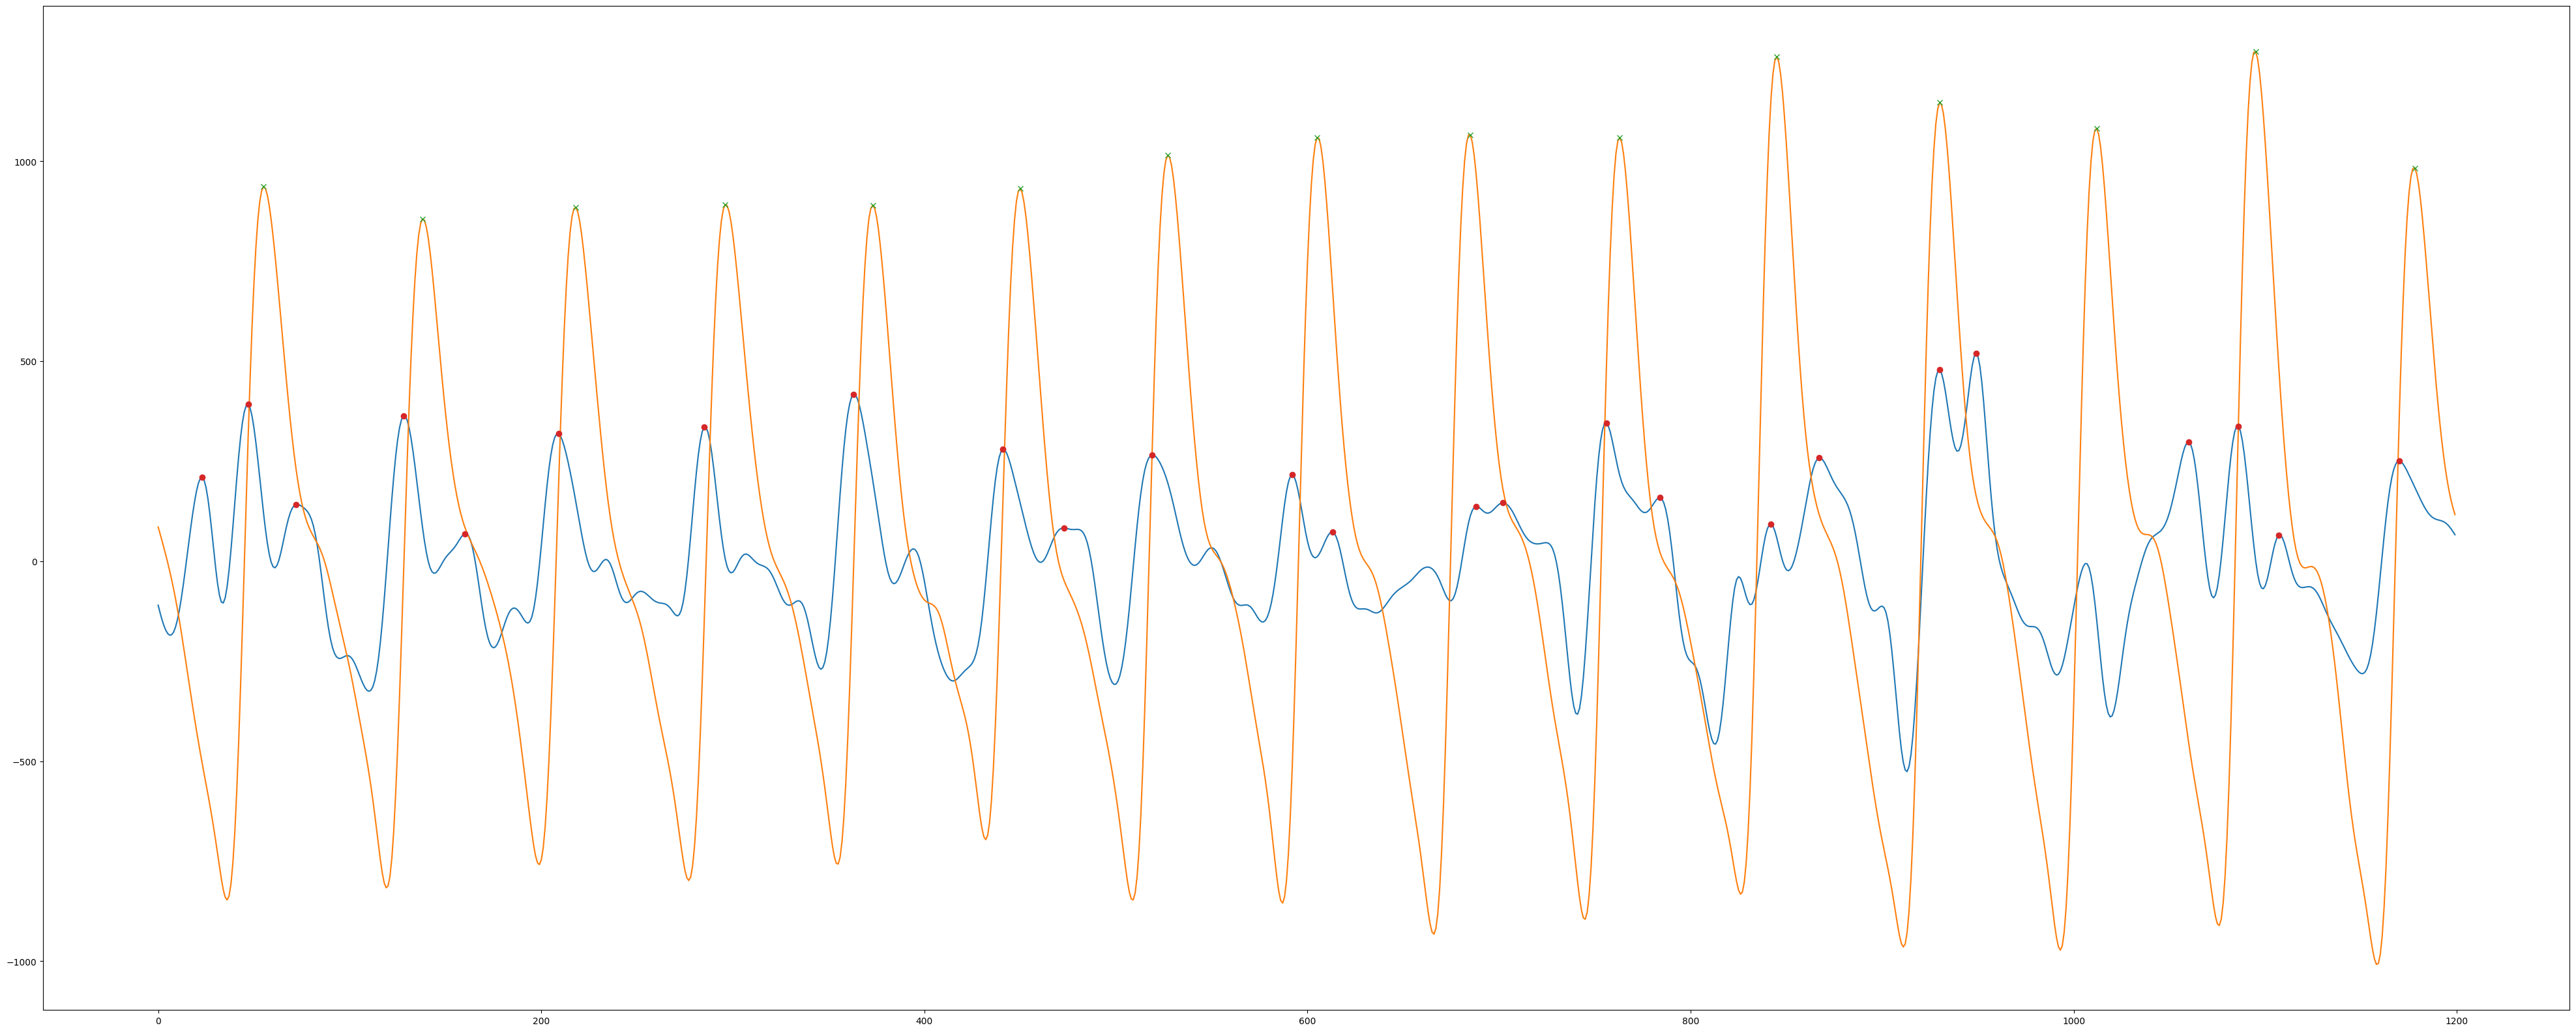

In [216]:
plt.figure(figsize=(50, 20))
plt.plot(changedY1)
plt.plot(changedY2)
plt.plot(changedPeaksY2, changedY2[changedPeaksY2],"x")
plt.plot(changedPeaksY1, changedY1[changedPeaksY1],"o")

In [154]:
def difference(a, b):
  newDifference = []
  for i in range(len(a)):
    newDifference.append(a[i] - b[i])
  return newDifference


In [239]:
# controlledDifference = difference(controlPeaksY2, controlPeaksY1)
# cutControlledDifference = ([a for a in controlledDifference if a > 4])
cutControlledDifference = [8,7,8,8,7,8,8,7,7,9,7, 11]
print(cutControlledDifference)
print(np.mean(cutControlledDifference))
print(np.std(cutControlledDifference))

[8, 7, 8, 8, 7, 8, 8, 7, 7, 9, 7, 11]
7.916666666666667
1.114924013354971


In [187]:
print(np.mean(difference(controlPeaksY2, controlPeaksY1)))
print(np.std(difference(controlPeaksY2, controlPeaksY1)))

5.076923076923077
1.3565532375806462


In [217]:
changedPeaksY1

array([  23,   47,   72,  128,  160,  209,  285,  363,  441,  473,  519,
        592,  613,  688,  702,  756,  784,  842,  867,  930,  949, 1060,
       1086, 1107, 1170])

In [172]:
[8, 9, 11, 10, 9, 8, 8, 7, 3, 9, 8]

[3, 3, 5, 2, 1, 5, 6, 7, 5, 4, 6, 2, 5, 13, 6, 5, 4, 4, 5, 5]

In [218]:
changedPeaksY2

array([  55,  138,  218,  296,  373,  450,  527,  605,  685,  763,  845,
        930, 1012, 1095, 1178])

In [236]:
# changedDifference = difference(changedPeaksY2, changedPeaksY1)
changedDifference =[8, 9, 9, 6, 10, 9, 8, 8, 7, 9, 8]
cutChangedDifference = ([a for a in changedDifference ])
print(cutChangedDifference)

[8, 9, 9, 6, 10, 9, 8, 8, 7, 9, 8]


In [232]:
print(np.mean(cutChangedDifference))
print(np.std(cutChangedDifference))

8.272727272727273
1.0523488093445659


In [240]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(cutControlledDifference, cutChangedDifference, alternative='less')

print(t_stat)
print(p_value)

-0.7509034803199237
0.23052146784487593


In [100]:
a = [127, 127, 129, 129, 127, 128, 129, 128, 128, 127, 129, 129, 127, 127, 127, 128, 127, 129, 128, 128, 129, 128, 128, 127, 127, 127, 129, 127, 128, 128, 129, 127, 128, 129, 127, 127, 128, 129, 127, 129, 128, 127, 128, 127, 128, 110, 111, 111, 110, 110, 111, 111, 110, 111, 111, 111, 110, 111, 111, 111, 111, 110, 111, 111, 111, 111, 110, 110, 110, 111, 111, 111, 110, 110, 110, 110, 111, 110, 111, 111, 111, 111, 111, 111, 110, 110, 111, 111, 111, 110, 128, 128, 139, 139, 139, 128, 142, 139, 139, 128, 128, 128, 128, 128, 142, 142, 142, 142, 128, 142, 142, 128, 128, 139, 139, 128, 142, 142, 139, 142, 142, 139, 142, 128, 142, 139, 128, 128, 142, 128, 142, 139, 139, 142, 139, 108, 110, 108, 108, 108, 109, 109, 108, 110, 110, 110, 109, 109, 110, 110, 110, 108, 109, 109, 108, 108, 108, 109, 109, 108, 109, 109, 109, 109, 108, 108, 109, 109, 109, 110, 109, 109, 108, 109, 110, 110, 110, 108, 109, 109, 114, 114, 115, 114, 113, 113, 114, 115, 115, 113, 115, 114, 115, 114, 113, 114, 115, 114, 115, 115, 114, 114, 113, 113, 115, 114, 115, 113, 114, 113, 115, 114, 114, 115, 113, 115, 115, 115, 114, 113, 113, 114, 115, 114, 114]

b = [120.33746, 121.82574, 122.09619, 121.66809, 122.975945, 122.203804, 128.53389, 124.03528, 125.96952, 121.37656, 130.71806, 124.21359, 120.74806, 120.92406, 123.85792, 120.46954, 128.83026, 120.81629, 121.613075, 121.569336, 120.82796, 123.155525, 121.30157, 126.905655, 129.06517, 124.71958, 120.97413, 121.89371, 121.26572, 121.89795, 126.61715, 122.45849, 122.35495, 121.28357, 127.07706, 121.38495, 124.67222, 120.435, 122.936615, 121.60548, 132.56218, 133.12085, 127.42519, 120.41883, 121.30955, 107.749664, 107.840195, 103.96082, 107.54109, 108.897865, 110.99305, 109.25901, 109.888664, 110.74818, 110.79676, 110.7862, 111.93507, 108.741425, 107.26641, 112.81341, 105.62631, 106.99939, 108.542, 108.97355, 107.656334, 108.050385, 107.5467, 107.055725, 112.01899, 109.17362, 111.0832, 102.79321, 109.088234, 109.44105, 110.17281, 112.41854, 109.650185, 108.608, 109.8407, 110.21857, 108.80463, 105.06409, 108.8165, 106.435165, 108.46156, 107.90233, 110.00916, 104.54509, 110.79607, 107.06853, 128.4929, 132.35188, 130.36826, 128.28496, 131.0574, 133.52492, 135.31042, 130.10757, 128.44128, 127.68491, 130.19867, 133.39539, 132.30939, 130.67921, 132.46515, 135.25558, 132.24454, 133.97711, 129.85269, 134.18665, 135.68167, 131.91331, 133.1784, 131.76135, 132.59193, 135.14209, 135.24066, 131.70158, 132.33258, 138.60764, 135.35104, 134.88223, 132.04869, 132.85786, 133.4951, 135.56747, 134.2773, 135.68932, 136.3745, 128.6024, 133.10054, 136.47508, 133.12428, 132.20186, 132.01219, 113.934586, 111.93428, 112.445175, 113.87896, 113.54736, 113.92407, 113.68979, 112.83128, 114.321365, 115.78957, 112.36211, 113.43747, 112.9628, 117.290375, 116.61928, 112.86709, 113.416794, 114.96933, 112.510544, 113.46353, 115.94857, 112.4716, 112.88259, 112.59244, 116.396416, 120.82656, 112.26029, 111.60769, 112.272095, 112.21688, 115.52679, 117.38002, 112.385475, 115.29837, 113.13188, 117.74077, 113.06809, 112.65636, 112.841034, 113.03792, 112.45753, 115.742836, 112.323784, 117.70606, 113.08426, 111.46945, 120.66085, 111.359695, 115.455635, 113.10467, 111.91238, 113.12501, 113.11775, 116.06992, 111.53388, 111.023026, 112.826, 117.42813, 109.87328, 110.85983, 113.018906, 119.2955, 109.82813, 112.81957, 113.41944, 112.47675, 112.49264, 115.79158, 110.95786, 111.46524, 114.37306, 113.98382, 112.16623, 119.26819, 115.21944, 112.06857, 111.3438, 112.76861, 113.109116, 111.97858, 115.77745, 109.19632, 113.56087, 111.15037, 115.191315, 112.69339, 111.25312, 110.94954, 118.37958, 113.99959]

predictedDifference = difference(b, a)
fiveThreshold = [a for a in predictedDifference if a < 5 and a > -5]
tenThreshold = [a for a in predictedDifference if a < 5 and a > -5]
print(len(fiveThreshold))
print(len(tenThreshold))
print(len(a))

142
142
225
